In [9]:
import numpy as np # Basic python numeric library
import control as ctrl # Control systems library
import matplotlib.pyplot as plt # Python plots library
%matplotlib inline

# Problem Description

We want to model, and simulate a Spring-Mass system, which is given by the following figure:

<img src="images/Spring_Mass.png">

In the above figure, we have three positive constants:
- k, the spring's constant.
- m, the block's mass.
- c, the friction coefficient.
Suppose, for a moment, that there is no driving force in the mass (we shall treat those cases later on). Thus, we can use Newton's second law to find a differential equation for the motion:

\begin{align}
    m\ddot{q} &= \sum F\\
              &= -F_{e} - F_{m}
              &= -c\dot{q} - kq
\end{align}

Therefore, our differential equation is,

\begin{align}
    m\ddot{q} + c\dot{q} + kq = 0
\end{align}

In a first attempt, we do not try to solve it. We want to see how can we model this through state-space equations. Henceforth, assume $\mathbf{x} = (q,\dot{q})$, namely, the position and velocity of the block. With this construction, we have:

\begin{align}
    \begin{bmatrix}
        \dot{q}\\
        \ddot{q}
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 & 1\\
        \dfrac{k}{m} & \dfrac{c}{m}
    \end{bmatrix}\begin{bmatrix}
        q\\
        \dot{q}
    \end{bmatrix}+\begin{bmatrix}
        0\\
        0
    \end{bmatrix}u\\
    y 
    &=
    \begin{bmatrix}
        1 & 0\\
        0 & 1
    \end{bmatrix}\begin{bmatrix}
        q\\
        \dot{q}
    \end{bmatrix}
    +
    \begin{bmatrix}
        0\\
        0
    \end{bmatrix}u
\end{align}

This system has the following properties,

* It is linear,
* It is time invariant
* It is proper
* It is SIMO (single input, multiple output)

# Simulation

In [39]:
# Parameters defining the system
m = 250 # system mass
k = 40  # spring constant
c = 60  # damping constant

In [48]:
# System matrices
A = np.array([[0, 1],[-k/m, -c/m]])
B = np.array([[0],[1/m]])
C = np.array([[1 , 0]])
sys = ctrl.ss(A, B, C, 0)

Here, we have used the function _ctrl.ss(A,B,C,D)_ for representing the state space model in the canonical equations, where $A,B,C$ and $D$ are constant matrices.

In [57]:
# Time domain simulation: natural response (zero input)
t = np.arange(0,100,0.1)
[t_anl, y_anl, _] = ctrl.forced_response(sys, T=t, X0 = [10,0])

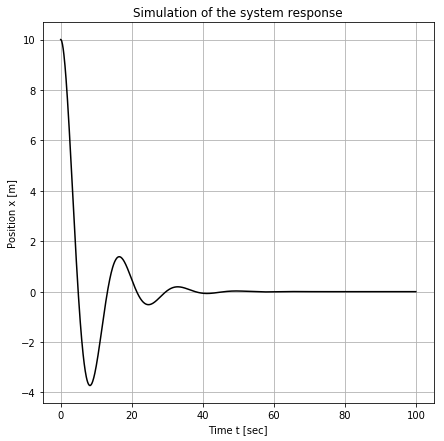

In [58]:
# plotting the results
plt.figure(figsize=(7,7))
plt.plot(t_anl, y_anl, 'k-')
plt.title('Simulation of the system response')
plt.ylabel('Position x [m]')
plt.xlabel('Time t [sec]')
plt.grid()
plt.show()

__Remark:__ try different values for the constants (m,k,c)

# Solving the Spring-Mass ODE

## Equation Analysis

Up to now, we have not done much. Currently, we have only changed notation in our systems, and used a computer to simulate the answer. We may also care about the mathematical tools to solve the problem.

To begin with, it is noteworthy that the ODE is a linear combination of derivatives. Thus, if we are to have a function $x(t)$ that is a solution to the ODE, it must have derivatives that are linear combinations of itself. In other words, $\dot{x}(t) = ax(t)$. As you might guess, from calculus, we now that such functions have the form $x(t) = Ae^{rt}$. Let us try this kind of answer in the ODE:

\begin{align}
    ms^{2}e^{rt} + cse^{rt} + ke^{rt} &= 0\\
    e^{rt}(mr^{2} + cr + k) &= 0\\
    mr^{2} + cr + k &= 0
\end{align}

Where to derive the last equation, we have used the fact that $e^{rt}\neq 0, \forall t$. The polynomial in $r$, $f(r) = mr^{2} + cr + k$ is said the characteristic polynomial of the ODE, and its solution gives rise to the solution of the ODE itself. We can express its roots by:

\begin{align}
    r &= \dfrac{-c \stackrel{+}{-} \sqrt{c^{2}-4mk}}{2m}
\end{align}

Particularly, our polynomial becomes,

\begin{align}
    250r^{2} + 60r + 40 = 0
\end{align}

which has roots:

\begin{align}
    r_{1} &= -\dfrac{3}{25} + i\dfrac{\sqrt{91}}{25}\\
    r_{2} &= -\dfrac{3}{25} - i\dfrac{\sqrt{91}}{25}
\end{align}

Expressing it as $r_{1} = \sigma + i\omega$, $r_{2} = \sigma - i\omega$, we have:

\begin{align}
    y(t) &= c_{1}e^{\sigma t}e^{i\omega t} + c_{2}e^{\sigma t}e^{-i\omega t}\\
         &= e^{\sigma t}(c_{1}(cos(\omega t) + isin(\omega t)) + c_{2}(cos(\omega t) + isin(\omega t)) )\\
         &= e^{\sigma t}((c_{1}+c_{2})cos(\omega t) + i(c_{1}-c_{2})sin(\omega t))\\
         &= e^{\sigma t}(Acos(\omega t) + Bsin(\omega t))
\end{align}

The derivative, at its time,

\begin{align}
    \dot{y}(t) &= \sigma e^{\sigma t}(Acos(\omega t) + Bsin(\omega t)) + e^{\sigma t}(-A \omega sin(\omega t) +  B \omega cos(\omega t))
\end{align}

Let us also consider the initial condition of $y(0) = A = 10$ and $\dot{y}(0) = \sigma + B\omega = 0$, that is, the block begins at 10m of distance, and with zero velocity. So, $A = 10$, $B = - \dfrac{\sigma}{\omega} = \dfrac{3\sqrt{91}}{91}$. We can, therefore, write our solution as:

\begin{align}
    y(t) &= \dfrac{10}{91}e^{-\dfrac{3}{25}t}\biggr(91cos\biggr(\dfrac{\sqrt{91}}{25}t\biggr) + 3\sqrt{91}sin\biggr(\dfrac{\sqrt{91}}{25}t\biggr)\biggr)\\
    y(t) &= \dfrac{40}{\sqrt{91}}e^{-\dfrac{3}{25}t}sin\biggr(\dfrac{\sqrt{91}}{25}t \biggr)
\end{align}

In [61]:
# Solution
t = np.arange(0,100,0.1)

sigma = -(3/25)
omega = (np.sqrt(91)/25)

c1 = 10 / 91
c2 = 3 * np.sqrt(91)
c3 = 40 / np.sqrt(91)

y  = c1 * np.exp(sigma * t)*(91 * np.cos(omega * t) + 3 * np.sqrt(91) * np.sin(omega * t))
dy = c3 * np.exp(sigma * t) * np.sin(omega * t)

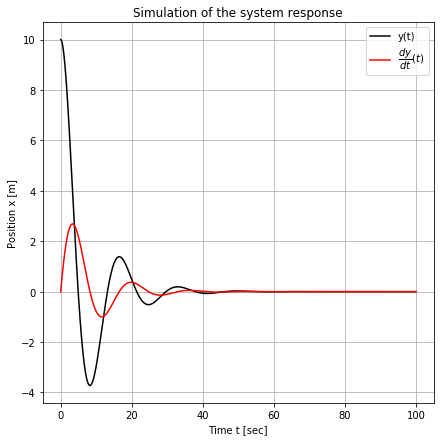

In [62]:
plt.figure(figsize=(7,7))
plt.plot(t, y, 'k-', label = 'y(t)')
plt.plot(t, dy, 'r-', label = r'$\dfrac{dy}{dt}(t)$')
plt.title('Simulation of the system response')
plt.ylabel('Position x [m]')
plt.xlabel('Time t [sec]')
plt.legend()
plt.grid()
plt.show()

## Phase plot

Looking at the above plot, it is clear that both the solution and its derivative goes to zero as time increases. Paying attention to the state vetor, $\mathbf{x} = (q,\dot{q})$, as time goes by, we have the following limit:

\begin{align}
   \lim_{t\rightarrow\infty}\mathbf{x}(t) = \begin{bmatrix} 0\\ 0 \end{bmatrix}
\end{align}

It is also interesting to plot the relationship between position and velocity in the plane. That is, for each time t, we look at the position of the solution on the plane $(\mathbf{x}_{1},\mathbf{x}_{2})$. Clearly, the solution shall generate a trajectory in such a space, as can be saw in the bellow figure:

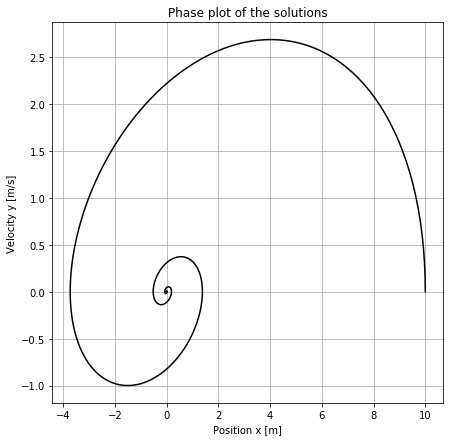

In [64]:
plt.figure(figsize=(7,7))
plt.title('Phase plot of the solutions')
plt.plot(y,dy,'k-')
plt.ylabel('Velocity y [m/s]')
plt.xlabel('Position x [m]')
plt.legend()
plt.grid()
plt.show()

# Actually solving the ODE - Optional part -


__Remark:__ Before proceeding, let us make a little change of notation: we shall call $(m,c,k)$ as $(a,b,c)$, for a more natural representation (closely to bhaskara) of roots. The solutions of $r$ can happen in three ways:


1. One or two real roots,
2. Purely imaginary roots,
3. Complex roots

We analyse each of these cases bellow:

## Two real roots

If the polynomial $ar^{2} + br + c = 0$ has to real roots, then we shall have $b > 2\sqrt{ac}$. In that case, denote $x_{1} = c_{1}e^{r_{1}t}$, $x_{2} = c_{2}e^{r_{2}t}$, we claim that $y(t) = x_{1} + x_{2}$ is a solution for the our differential equation. Indeed:

\begin{align}
    \dot{y}   &= c_{1}r_{1}e^{r_{1}t} + c_{2}r_{2}e^{r_{2}t}\\
    \ddot{y} &= c_{1}r_{1}^{2}e^{r_{1}t} + c_{2}r_{2}^{2}e^{r_{2}t}
\end{align}

And thus, we can rewrite the ODE as:

\begin{align}
    a\ddot{y} + b\dot{y} + cy &= a(c_{1}r_{1}^{2}e^{r_{1}t} + c_{2}r_{2}^{2}e^{r_{2}t}) + b(c_{1}r_{1}e^{r_{1}t} + c_{2}r_{2}e^{r_{2}t}) + c(x_{1} + x_{2})\\
                                             &= e^{r_{1}t}(ar_{1}^{2} + br_{1} + c) + e^{r_{2}t}(ar_{2}^{2} + br_{2} + c)\\
                                             &= e^{r_{1}t}\cdot 0 + e^{r_{2}t}\cdot 0\\
                                             &= 0
\end{align}

So $y(t)$ is a solution as well. It is indeed, unique.

### Example 1.

Consider the following ODE:

\begin{align}
    \ddot{x}(t) + 5\dot{x}(t) + 6x(t) = 0
\end{align}

Notice that its solution comes from solving the second order polynomial $s^{2} + 5s + 6 = (s+2)(s+3)$, which has roots $s_{1} = -2$ and $s_{2} = -3$. Therefore:

\begin{align}
    x(t) = c_{1}e^{-2t} + c_{2}e^{-3t} \rightarrow \dot{x}(t) = -2c_{1}e^{-2t} - 3c_{2}e^{-3t}
\end{align}

Now, suppose the initial conditions impose that $c_{1},c_{2} > 0$, then we have the following limits:

\begin{align}
    \lim\limits_{t\rightarrow +\infty}x(t) = 0\\
    \lim\limits_{t\rightarrow -\infty}x(t) = +\infty\\
    \lim\limits_{t\rightarrow +\infty}\dot{x}(t) = 0\\
    \lim\limits_{t\rightarrow -\infty}\dot{x}(t) = -\infty
\end{align}

### Example 2.

Consider the following ODE:

\begin{align}
    \ddot{x}(t) - x(t) = 0
\end{align}

Its polynomial is given by $s^{2} - 1 = (s-1)(s+1)$, which yields the solution:

\begin{align}
    x(t) = c_{1}e^{t} + c_{2}e^{-t} \rightarrow \dot{x}(t) = c_{1}e^{t} - c_{2}e^{-t}
\end{align}

Now, suppose the initial conditions impose that $c_{1},c_{2} > 0$, then we have the following limits:

\begin{align}
    \lim\limits_{t\rightarrow +\infty}x(t) = +\infty\\
    \lim\limits_{t\rightarrow -\infty}x(t) = +\infty\\
    \lim\limits_{t\rightarrow +\infty}\dot{x}(t) = +\infty\\
    \lim\limits_{t\rightarrow -\infty}\dot{x}(t) = -\infty
\end{align}

### Example 3.

Consider the following ODE:

\begin{align}
    \ddot{x}(t) - 5\dot{x}(t) + 6x(t) = 0
\end{align}

Its polynomial is given by $s^{2} - 5s + 6 = (s-3)(s - 2)$, which yields the solution:

\begin{align}
    x(t) = c_{1}e^{2t} + c_{2}e^{3t} \rightarrow \dot{x}(t) = 2c_{1}e^{2t} + 3c_{2}e^{3t}
\end{align}

Now, suppose the initial conditions impose that $c_{1},c_{2} > 0$, then we have the following limits:

\begin{align}
    \lim\limits_{t\rightarrow +\infty}x(t) = +\infty\\
    \lim\limits_{t\rightarrow -\infty}x(t) = 0\\
    \lim\limits_{t\rightarrow +\infty}\dot{x}(t) = +\infty\\
    \lim\limits_{t\rightarrow -\infty}\dot{x}(t) = 0
\end{align}

## Repeated roots - Can be skipped -

It happens when the characteristic equation

\begin{align}
    ar^{2} + br + c = 0
\end{align}

has only one solution, that is, b = 2\sqrt{ac}. In that case, we have only one solution $s = -\dfrac{b}{2a}$. The solution generated by this approach is then:

\begin{align}
    x(t) = ce^{-\dfrac{b}{2a}}
\end{align}

However, since this is a second-order equation, the space of solutions should have dimension two (that is, we should have two linearly independent functions generating the space of solutions). Therefore, we look forward another solution x_{1}(t) such that it differs from $x(t)$ more than a constant. That is, we are interested in $x_{1}(t) = \eta(t)x(t)$. Taking derivatives:

\begin{align}
    \dot{x}_{1}(t) &= \dot{\eta}(t)x(t) + \eta(t)\dot{x}(t)\\
    \ddot{x}_{1}(t) &= \ddot{\eta}(t)x(t) + 2\dot{\eta}(t)\dot{x}(t) + \eta(t)\ddot{x}(t)
\end{align}

Therefore:

\begin{align}
    \dot{x}_{1}(t) &= e^{-\dfrac{b}{2a}}(\dot{\eta} - \dfrac{b}{2a}\eta)\\
    \ddot{x}_{1}(t) &= e^{-\dfrac{b}{2a}}(\ddot{\eta}(t) - \dfrac{b}{a}\dot{\eta}(t) + \dfrac{b^{2}}{4a^{2}}\eta(t))
\end{align}

So:

\begin{align}
    a\ddot{x}_{1} + b\dot{x}_{1} + cx_{1} = 0\\
    ae^{-\dfrac{b}{2a}}(\ddot{\eta}(t) - \dfrac{b}{a}\dot{\eta}(t) + \dfrac{b^{2}}{4a^{2}}\eta(t)) + be^{-\dfrac{b}{2a}}(\dot{\eta} - \dfrac{b}{2a}\eta) + c\eta e^{-\dfrac{b}{2a}} = 0\\
    a\ddot{\eta}(t) - b\dot{\eta}(t) +  \dfrac{b^{2}}{4a}\eta(t) + b\dot{\eta}(t) - \dfrac{2b^{2}}{4a}\eta(t) + \dfrac{4ac}{4a}\eta(t) = 0\\
    \ddot{\eta}(t) = 0
\end{align}

With that, we conclude that $\eta(t) = c_{1}t+c_{2}$, and the general solution looks like:

\begin{align}
    x(t) &= c_{1}te^{rt} + c_{2}e^{rt}\\
    \dot{x}(t) &= c_{1}e^{rt} + sc_{1}te^{rt} + sc_{2}e^{rt}\\
               &= sc_{1}te^{rt} + (c_{1}+rc_{2})e^{rt}
\end{align}

## Complex roots

By the fundamental theorem of algebra, any second order polynomial with real roots has two (possible complex) roots. Thus, we have explored the case where both roots of $as^{2} + bs + c = 0$ are real (different or equal). Now, we suppose that $b < 2\sqrt{ac}$. If, additionally $b = 0$, the roots of this polynomial shall have pure imaginary roots, as we will view.

### Pure imaginary roots

If $b = 0$, and $c \neq 0$, then $\sqrt{\Delta} = \sqrt{-4ac} = 2i\sqrt{ac}$. Then the roots of our polynomial are:

\begin{align}
    s_{1} &= \dfrac{i\sqrt{ac}}{2a}\\
    s_{2} &= -\dfrac{i\sqrt{ac}}{2a}
\end{align}

We shall take, in order to shorten our notation, $\omega = \dfrac{\sqrt{ac}}{2a}$. Therefore, our solution looks like:

\begin{align}
    x(t) &= c_{1}e^{i\omega t} + c_{2}e^{-i\omega t}\\
\end{align}

Rearranging terms:

\begin{align}
    x(t) &= c_{1}e^{i\omega t} + c_{2}e^{-i\omega t}\\
          &= c_{1}(cos(\omega t)+isen(\omega t)) + c_{2}(cos(\omega t)-isin(\omega t))\\
          &= (c_{1}+c_{2})cos(\omega t) + i(c_{1}-c_{2})sin(\omega t)\\
          &= Acos(\omega t) + Bsin(\omega t)\\
\end{align}

Where $D$ was a carefully choosen constant such that $cos(\varphi) = \dfrac{A}{D} < 1$ and $sin(\varphi) = \dfrac{B}{D} < 1$. Differentiating $x(t)$ gives us $\dot{x}(t)$:

\begin{align}
    \dot{x}(t) &= -A\omega sin(\omega t) + B\omega cos(\omega t)\\
               &= C cos(\omega t) + D sin(\omega t)
\end{align}

Thus we have oscilatory responses.

### Complex roots

We shall consider the case where we have complex roots $s_{1} = \sigma + i\omega$, $s_{2} = \sigma - i\omega$, being so , we have:

\begin{align}
    x(t) &= c_{1}e^{\sigma t}e^{i\omega t} + c_{2}e^{\sigma t}e^{-i\omega t} \\
          &= e^{\sigma t}(c_{1}(cos(\omega t) + isin(\omega t)) + c_{2}(cos(\omega t) - isin(\omega t)))\\
          &= e^{\sigma t}((c_{1}+c_{2})cos(\omega t) + i(c_{1}-c_{2})sin(\omega t))\\
          &= e^{\sigma t}(Acos(\omega t) + Bsin(\omega t)), A = c_{1} + c_{2}, B = i(c_{1} - c_{2})\\
\end{align}

Having chosen $D$ as in the last section. For the derivative:

\begin{align}
    \dot{x}(t) &= \sigma e^{\sigma t}(Acos(\omega t) + Bsin(\omega t)) + e^{\sigma t}(-A\omega sin(\omega t) + B\omega cos(\omega t))\\
               &= e^{\sigma t} ((A\sigma + B\omega)cos(\omega t) + (B\sigma - A\omega)sin(\omega t))\\
               &= e^{\sigma t} (C cos(\omega t) + D sin(\omega t))\\
\end{align}

Which gives us another kind of oscilatory response: one that decreases or increases the oscilations magnitude.